In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from sklearn import utils
from sklearn.preprocessing import PolynomialFeatures
import sklearn

In [71]:
grad = pd.read_csv("gradRates.csv", encoding = "ISO-8859-1")
grad
grad.columns =["CO_Code", "County", "DIST_Code", "DIST_Name", "SCHL_Code", "SCHL_Name", "4-Year_Rate", "5-Year_Rate"]


In [72]:
df = grad.drop([0])
df = df[["County", "4-Year_Rate", "5-Year_Rate"]]

df = df.dropna()
df.drop(df[df['4-Year_Rate'] == "*"].index, inplace = True)


In [73]:
df = df.astype({"4-Year_Rate":float, "5-Year_Rate": float})
df = df.groupby("County").mean()

In [74]:
%store -r countyStats
county = countyStats.reset_index()


county["County"] = county["County"].str.upper()
county_join = county.merge(df, on ='County')
cj = county_join.sort_values("County")

cj = cj.drop(columns = "5-Year_Rate")
cj

,County,Average Income,Average Teacher Salary,4-Year_Rate
17,ATLANTIC,61777,66846.0,89.934000
4,BERGEN,94107,69145.0,94.910851
6,BURLINGTON,87673,63120.0,92.457500
15,CAMDEN,66196,60758.0,87.428333
14,CAPE MAY,66953,67241.0,86.114000
20,CUMBERLAND,52627,58959.0,81.820000
19,ESSEX,60430,62897.0,88.435000
7,GLOUCESTER,86496,62336.0,92.727143
13,HUDSON,67154,59076.0,87.638000
2,HUNTERDON,112038,62158.0,96.938000


In [75]:
%store -r crimerate
crimerate

crimerate["County"] = crimerate["County"].str.upper()
cr_join = crimerate.merge(cj, on ="County")
new = cr_join.drop(columns = ["Crime Index", "Population"])
data = new.set_index("County")
#data = data.round(decimals = 4)
data

,Crime Rate per 100000,Average Income,Average Teacher Salary,4-Year_Rate
County,,,,
ATLANTIC,213.18,61777,66846.0,89.934000
BERGEN,90.95,94107,69145.0,94.910851
BURLINGTON,140.93,87673,63120.0,92.457500
CAMDEN,226.18,66196,60758.0,87.428333
CAPE MAY,157.85,66953,67241.0,86.114000
CUMBERLAND,280.67,52627,58959.0,81.820000
ESSEX,213.73,60430,62897.0,88.435000
GLOUCESTER,161.88,86496,62336.0,92.727143
HUDSON,138.37,67154,59076.0,87.638000


In [87]:
label = "4-Year_Rate"

#new array without label
X = np.array(data.drop([label],1))
y = np.array(data[label])
np.set_printoptions(suppress=True)

#Random split of data train and test variables using 80-20 train ratio

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = .2)


In [88]:
#fit the variables to model using Linear Regression
linear = LinearRegression()
linear.fit(x_train,y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
#fit the variables to model using SVR 
svm = SVR()

svm.fit(x_train, y_train)




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [90]:

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)
lin2 = LinearRegression()
lin2.fit(x_poly,y)

print("Linear Accuracy Score:", linear.score(x_test,y_test))
print("SVR Accuracy Score:", svm.score(x_test,y_test))
print("Polynomial Accuracy Score:", lin2.score(poly_reg.fit_transform(x_test),y_test))

Linear Accuracy Score: 0.5274860284544978
SVR Accuracy Score: 0.2926512246062104
Polynomial Accuracy Score: 0.5111038300388782


In [91]:
y_pred = lin2.predict(poly_reg.fit_transform(x_test))

In [92]:
#Predict the model using Polynomial Regression


for i in range(len(y_pred)):
    print("Coef:",x_test[i],"\n","Predicted Grad Rate:", y_pred[i], "\n" "Actual Grad Rate:",y_test[i], "\n")
    
print("R^2 Score:", r2_score(y_test,y_pred), "\n")

Coef: [  182.25 79173.   63578.  ] 
 Predicted Grad Rate: 90.0141777539796 
Actual Grad Rate: 85.61999999999999 

Coef: [  161.88 86496.   62336.  ] 
 Predicted Grad Rate: 90.5612377277698 
Actual Grad Rate: 92.72714285714285 

Coef: [  118.17 98270.   62179.  ] 
 Predicted Grad Rate: 92.82536639103344 
Actual Grad Rate: 93.92096774193546 

Coef: [    91.96 112153.    63962.  ] 
 Predicted Grad Rate: 93.21750765258062 
Actual Grad Rate: 93.44833333333334 

Coef: [   90.95 94107.   69145.  ] 
 Predicted Grad Rate: 93.55484557723759 
Actual Grad Rate: 94.91085106382978 

R^2 Score: 0.5111038300388782 



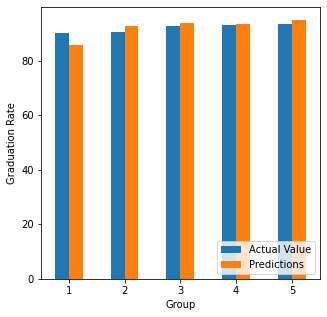

In [93]:

#bar graph of actual vs prediction results
result = pd.DataFrame( y_test, y_pred).reset_index()
result.columns = ["Actual Value","Predictions"]
Group = ["1", "2","3","4","5"]
result["Group"] = Group
result = result.set_index("Group")
result
ax = result.plot.bar(figsize = (5,5), rot = 0)
ax.set_ylabel("Graduation Rate")
ax.legend(loc= "lower right")

[79173.0, 86496.0, 98270.0, 112153.0, 94107.0]
[90.01417775 90.56123773 92.82536639 93.21750765 93.55484558]


Text(0.5, 1.0, 'Prediction')

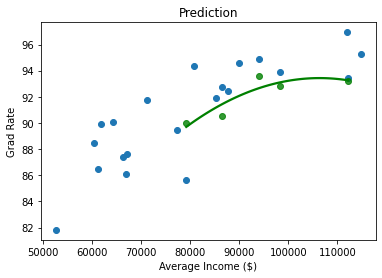

In [94]:
#Graph of predicted reults to actual results
inc = np.array(data["Average Income"])
grad = np.array(data[label])


plt.scatter(inc,grad)
inc_test= []
for i in range (len(x_test)):
    inc_test.append(x_test[i][1])
print(inc_test)
print(y_pred)

ax = sns.regplot(inc_test,y_pred, order = 2 , ci = None, color = "g")
ax.set_xlabel("Average Income ($)")
ax.set_ylabel("Grad Rate")
ax.set_title("Prediction")

[63578.0, 62336.0, 62179.0, 63962.0, 69145.0]


[(80.0, 100.0)]

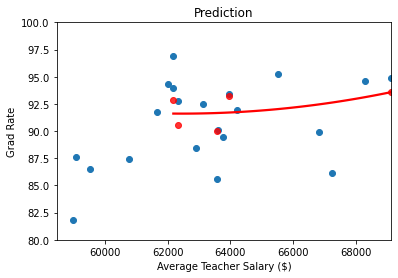

In [95]:
#Graph of predicted reults to actual results



sal = np.array(data["Average Teacher Salary"])

plt.scatter(sal,grad)

sal_test= []
for i in range (len(x_test)):
    sal_test.append(x_test[i][2])
print(sal_test)


ax = sns.regplot(sal_test,y_pred, color = "r", ci= None, order =2)
ax.set_xlabel("Average Teacher Salary ($)")
ax.set_ylabel("Grad Rate")
ax.set_title("Prediction")
ax.set(ylim=(80,100))


[182.25, 161.88, 118.17, 91.96, 90.95]
[90.01417775 90.56123773 92.82536639 93.21750765 93.55484558]


Text(0.5, 1.0, 'Prediction')

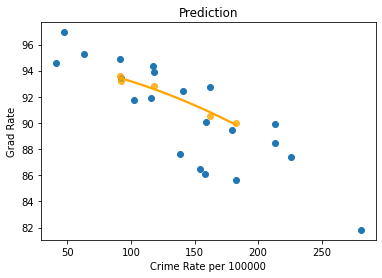

In [96]:
#Graph of predicted reults to actual results


crime = np.array(data["Crime Rate per 100000"])
grad = np.array(data[label])

plt.scatter(crime,grad)

crime_test= []
for i in range (len(x_test)):
    crime_test.append(x_test[i][0])
print(crime_test)
print(y_pred)


#plt.plot(crime_test,y_pred, color = "orange")
ax = sns.regplot(crime_test,y_pred,  color = "orange", ci = None, order = 2 )
ax.set_xlabel("Crime Rate per 100000")
ax.set_ylabel("Grad Rate")
ax.set_title("Prediction")

Text(0.5, 1.0, 'Average Teacher Salary vs Household Income')

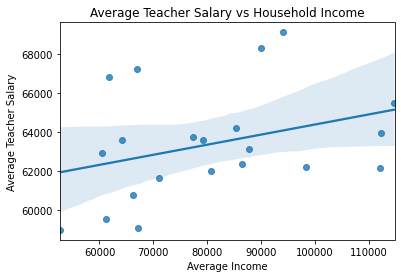

In [86]:
sal = "Average Teacher Salary"
income = "Average Income"
ax = sns.regplot(data = data, x= income , y= sal)
ax.set_title("Average Teacher Salary vs Household Income")

Text(0.5, 1.0, 'Average Household Income vs Grad Rate')

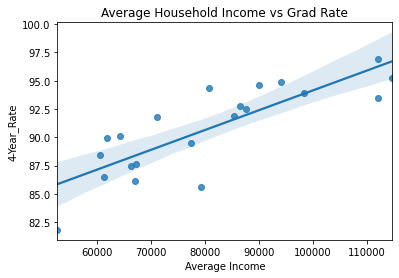

In [140]:
income = "Average Income"
ax = sns.regplot(data = data, x= income , y= label)
ax.set_title("Average Household Income vs Grad Rate")

Text(0.5, 1.0, 'Average Teacher Salary vs Grad Rate')

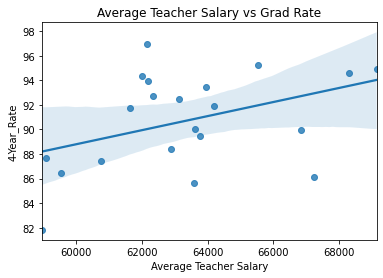

In [141]:
sal = "Average Teacher Salary"

ax = sns.regplot(data = data, x= sal , y= label)
ax.set_title("Average Teacher Salary vs Grad Rate")

Text(0.5, 1.0, 'Crime Rate vs Grad Rate')

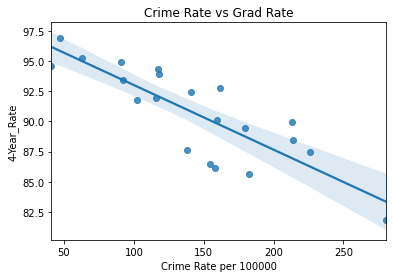

In [142]:
cr = "Crime Rate per 100000"
ax = sns.regplot(data = data, x= cr , y= label)
ax.set_title("Crime Rate vs Grad Rate")